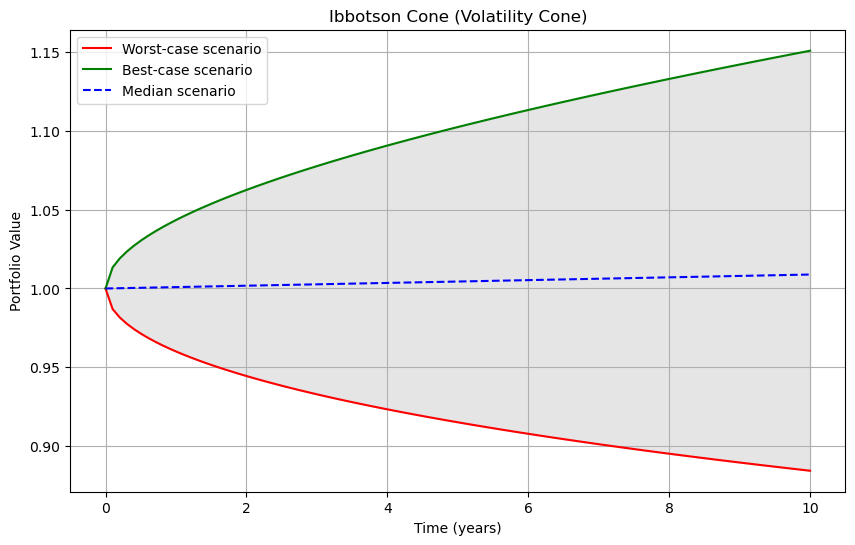

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load historical returns data
# Assuming you have a CSV file with a column 'Returns' containing historical returns
# For example, 'historical_returns.csv' with a column 'Returns'

# Replace 'historical_returns.csv' with your actual data file
#historical_data = pd.read_csv('historical_returns.csv')
returns = returns['Returns'].dropna()

# Calculate historical mean return and volatility
mu = returns.mean()
sigma = returns.std()

# Parameters
initial_investment = 1  # initial investment amount
confidence_level = 0.99  # confidence level for worst-case
time_horizon = 10  # in years
num_points = 100  # number of points in time horizon

# Time increments
delta_t = np.linspace(0, time_horizon, num_points)

# Calculate the z-score for the given confidence level
z = norm.ppf(confidence_level)

# Calculate the worst-case and best-case scenarios
worst_case = initial_investment * np.exp(delta_t * mu - np.sqrt(delta_t) * sigma * z)
best_case = initial_investment * np.exp(delta_t * mu + np.sqrt(delta_t) * sigma * z)
median_case = initial_investment * np.exp(delta_t * mu)

# Plotting the Ibbotson Cone
plt.figure(figsize=(10, 6))
plt.plot(delta_t, worst_case, label='Worst-case scenario', color='red')
plt.plot(delta_t, best_case, label='Best-case scenario', color='green')
plt.plot(delta_t, median_case, label='Median scenario', color='blue', linestyle='--')

plt.fill_between(delta_t, worst_case, best_case, color='gray', alpha=0.2)

plt.title('Ibbotson Cone (Volatility Cone)')
plt.xlabel('Time (years)')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid(True)
plt.show()
